In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM

In [ ]:
# loading dataframe in pandas df format

DATA_DIR_A = '/content/drive/MyDrive/dataset/Z/'
DATA_DIR_E = '/content/drive/MyDrive/dataset/S/'
DATA_DIR_B= '/content/drive/MyDrive/dataset/O/'
DATA_DIR_C= '/content/drive/MyDrive/dataset/N/'
DATA_DIR_D= '/content/drive/MyDrive/dataset/F/'

LABEL_C1 = 0  # Label for non seizure readings
LABEL_C2 = 1  # Label for seizure readings


df = pd.DataFrame(columns=['Image', 'Label'])

def load_data_into_dataframe():
    global df
    data = []

    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        label = LABEL_C1

        data.append({'Image': img, 'Label': label})

    for fname in tqdm(os.listdir(DATA_DIR_B)):
        img = np.loadtxt(DATA_DIR_B+ fname)
        label = LABEL_C1

        data.append({'Image': img, 'Label': label})


    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        label = LABEL_C2

        data.append({'Image': img, 'Label': label})

    for fname in tqdm(os.listdir(DATA_DIR_C)):
        img = np.loadtxt(DATA_DIR_C + fname)
        label = LABEL_C2
        data.append({'Image': img, 'Label': label})

    for fname in tqdm(os.listdir(DATA_DIR_D)):
        img = np.loadtxt(DATA_DIR_D + fname)
        label = LABEL_C2
        data.append({'Image': img, 'Label': label})

    df = pd.DataFrame(data)
    return df

df = load_data_into_dataframe()

print(df.head())

100%|██████████| 100/100 [00:00<00:00, 223.83it/s]

                                               Image  Label
0  [-62.0, -55.0, -44.0, -42.0, -33.0, -31.0, -24...      0
1  [31.0, 25.0, 17.0, 7.0, 4.0, 4.0, 4.0, 6.0, -2...      0
2  [30.0, 19.0, -3.0, -14.0, -12.0, -5.0, 10.0, 2...      0
3  [-87.0, -89.0, -73.0, -69.0, -51.0, -48.0, -51...      0
4  [8.0, 17.0, 29.0, 46.0, 50.0, 44.0, 28.0, 19.0...      0


In [ ]:

#splitting database into inout and targer columns
X = np.array(df['Image'].tolist())
y = np.array(df['Label'].tolist())
print(df.size)
print(df.shape)
print(df.head())
print(df.tail())
df.info()
df.describe()
df['Image']

1000
(500, 2)
                                               Image  Label
0  [-62.0, -55.0, -44.0, -42.0, -33.0, -31.0, -24...      0
1  [31.0, 25.0, 17.0, 7.0, 4.0, 4.0, 4.0, 6.0, -2...      0
2  [30.0, 19.0, -3.0, -14.0, -12.0, -5.0, 10.0, 2...      0
3  [-87.0, -89.0, -73.0, -69.0, -51.0, -48.0, -51...      0
4  [8.0, 17.0, 29.0, 46.0, 50.0, 44.0, 28.0, 19.0...      0
                                                 Image  Label
495  [-131.0, -153.0, -177.0, -194.0, -204.0, -208....      1
496  [67.0, 86.0, 99.0, 109.0, 115.0, 120.0, 116.0,...      1
497  [-41.0, -41.0, -48.0, -48.0, -44.0, -33.0, -23...      1
498  [45.0, 52.0, 79.0, 117.0, 146.0, 160.0, 178.0,...      1
499  [18.0, 30.0, 41.0, 57.0, 72.0, 80.0, 91.0, 95....      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   500 non-null    object
 1   Label   500 non-null    int64 
dtypes

,Image
0,"[-62.0, -55.0, -44.0, -42.0, -33.0, -31.0, -24..."
1,"[31.0, 25.0, 17.0, 7.0, 4.0, 4.0, 4.0, 6.0, -2..."
2,"[30.0, 19.0, -3.0, -14.0, -12.0, -5.0, 10.0, 2..."
3,"[-87.0, -89.0, -73.0, -69.0, -51.0, -48.0, -51..."
4,"[8.0, 17.0, 29.0, 46.0, 50.0, 44.0, 28.0, 19.0..."
...,...
495,"[-131.0, -153.0, -177.0, -194.0, -204.0, -208...."
496,"[67.0, 86.0, 99.0, 109.0, 115.0, 120.0, 116.0,..."
497,"[-41.0, -41.0, -48.0, -48.0, -44.0, -33.0, -23..."
498,"[45.0, 52.0, 79.0, 117.0, 146.0, 160.0, 178.0,..."


In [ ]:
np.size(df['Image'][0])

4097

<ipython-input-26-f934d285aeb3>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = df.groupby('Label').apply(lambda x: x.sample(5)).reset_index(drop=True)


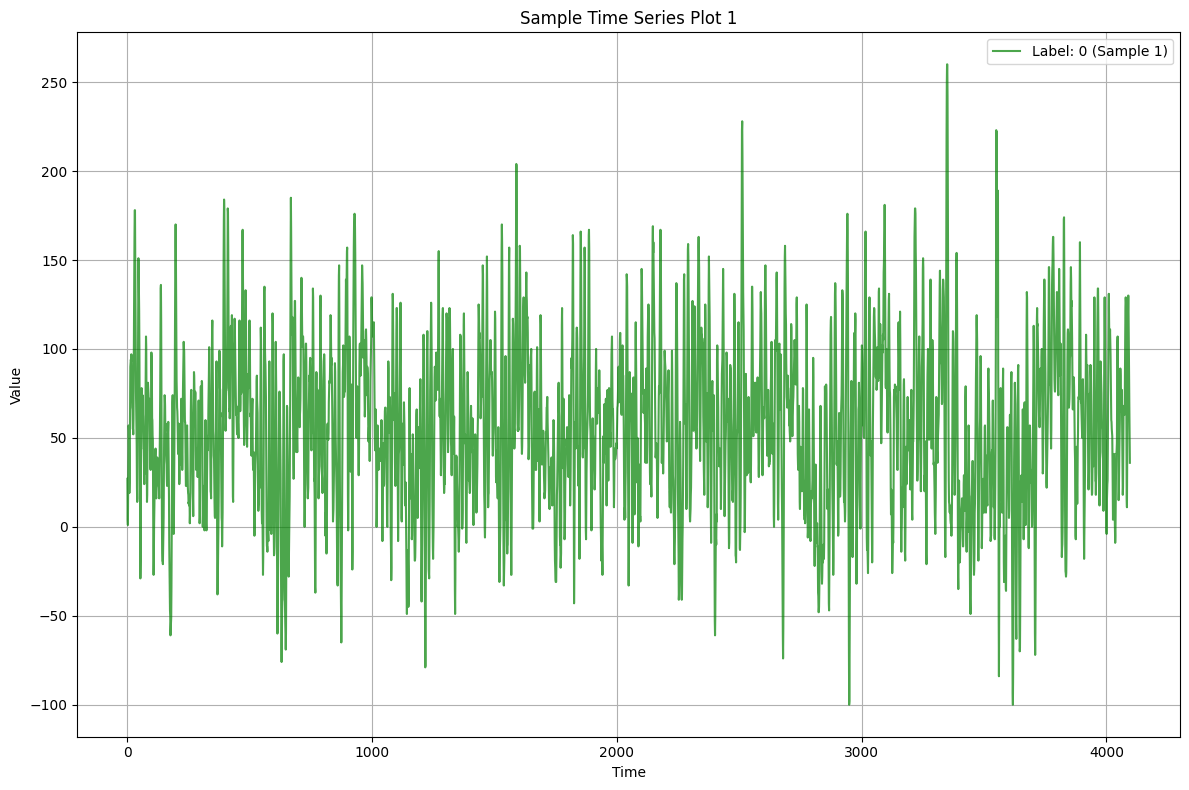

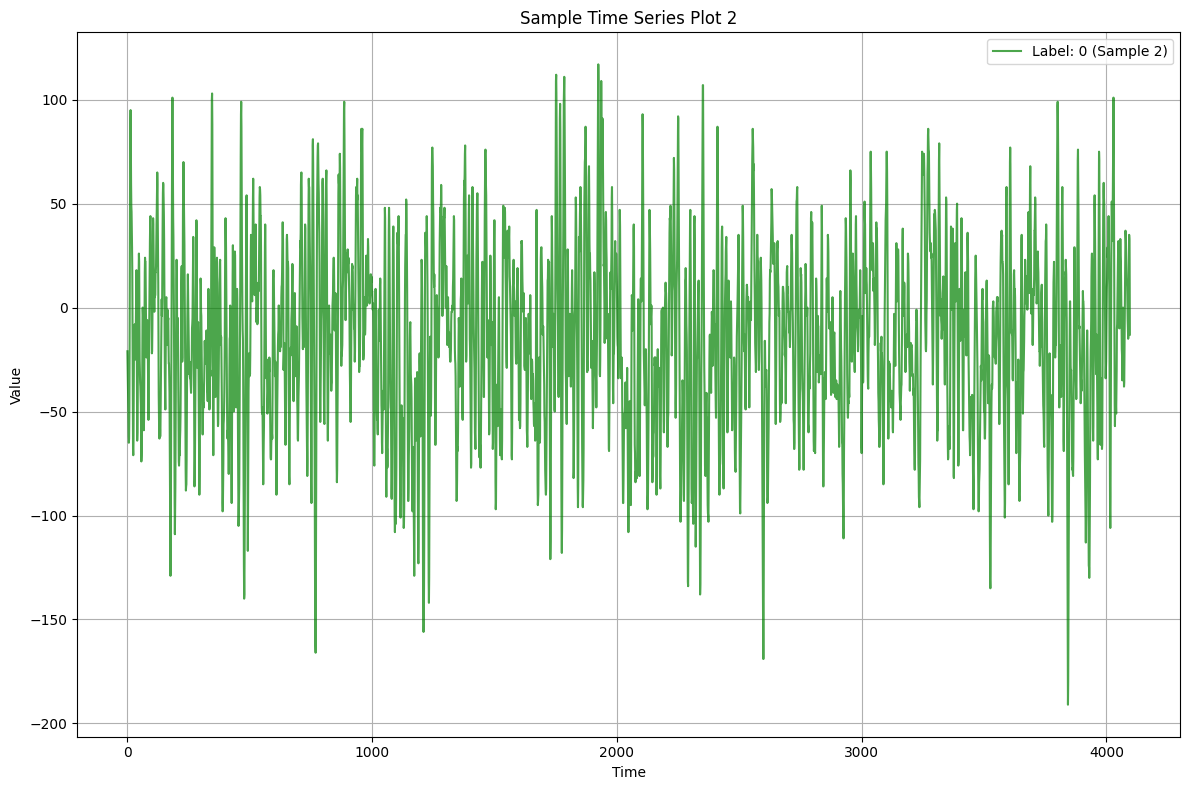

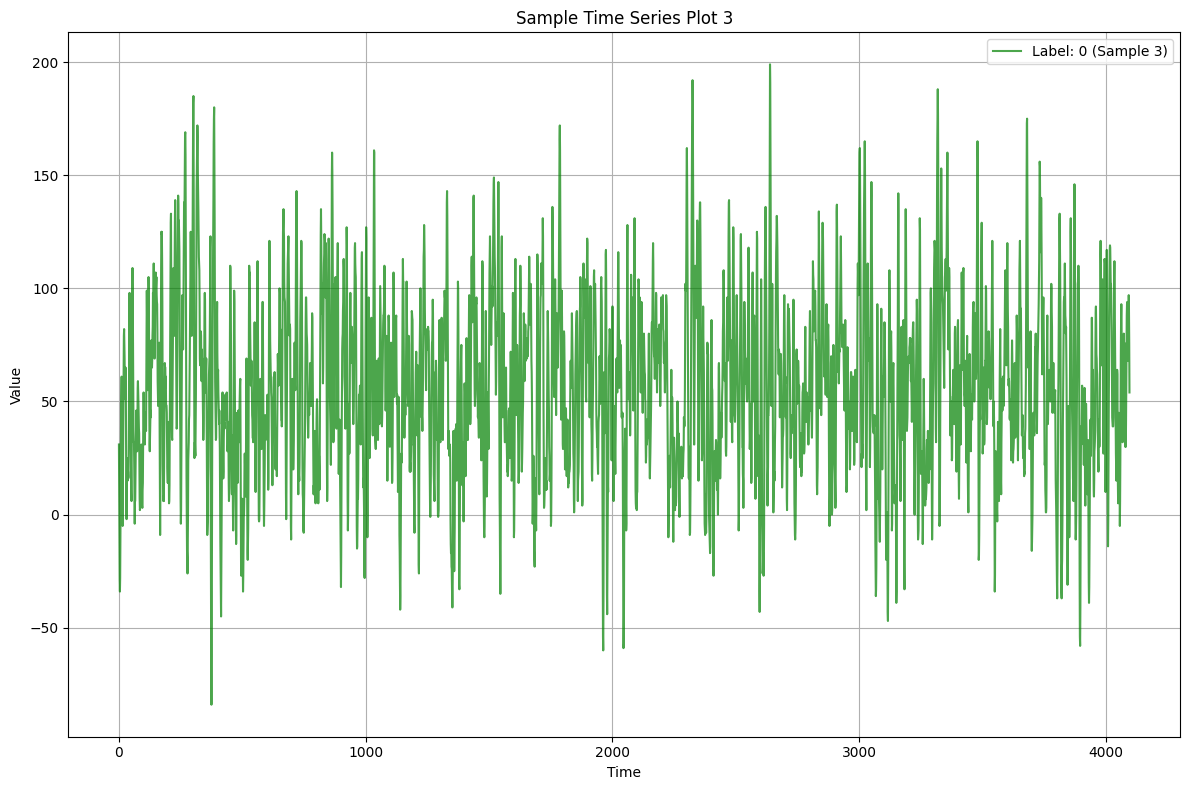

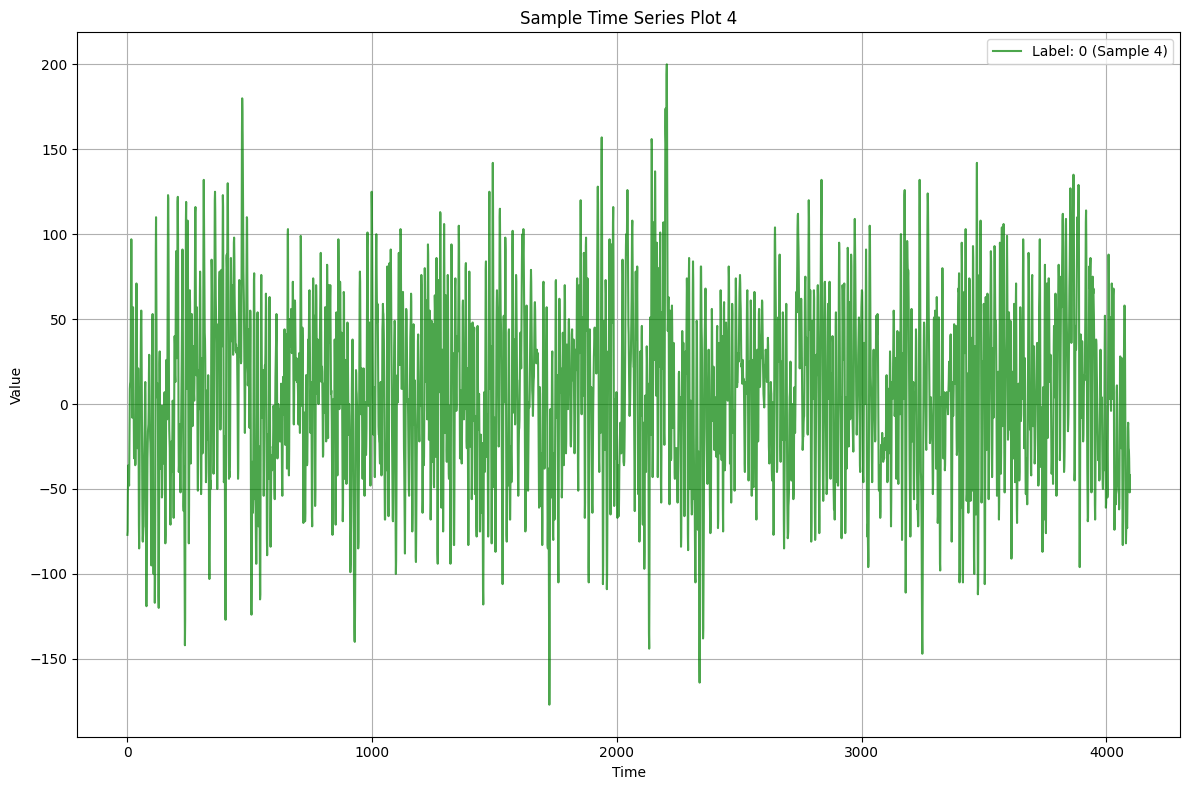

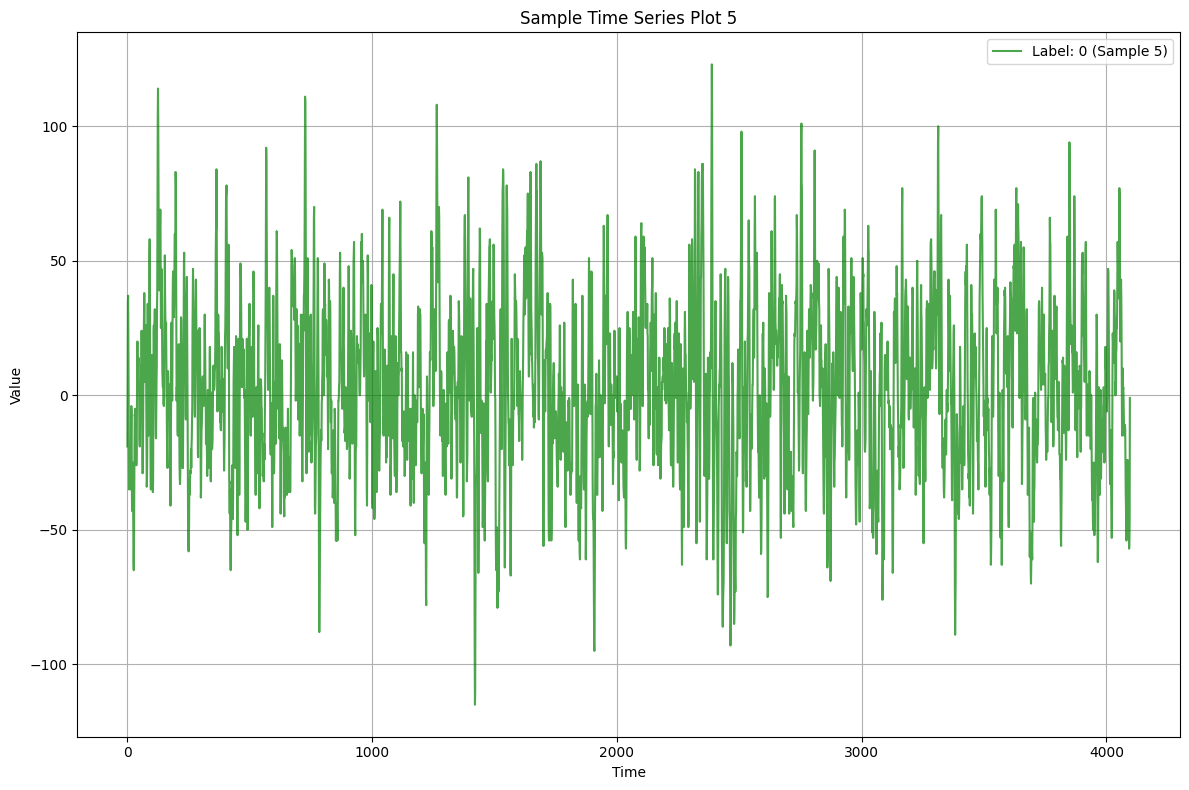

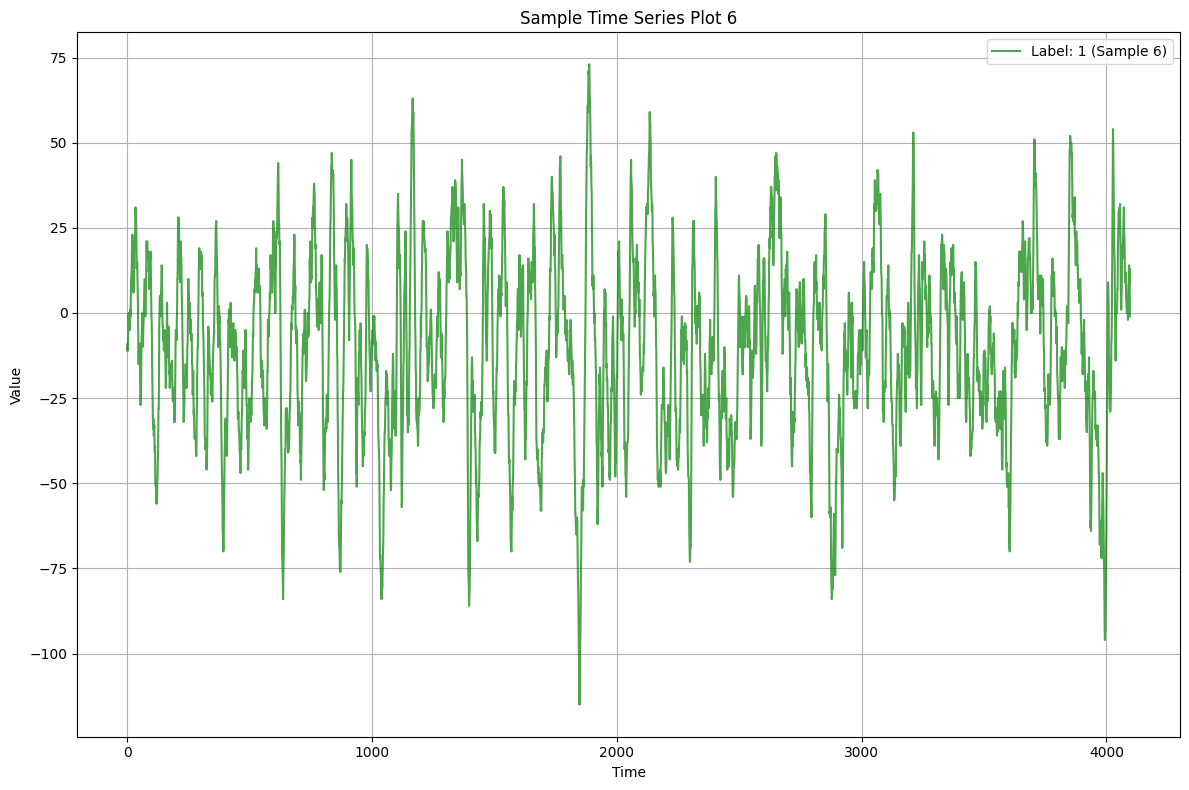

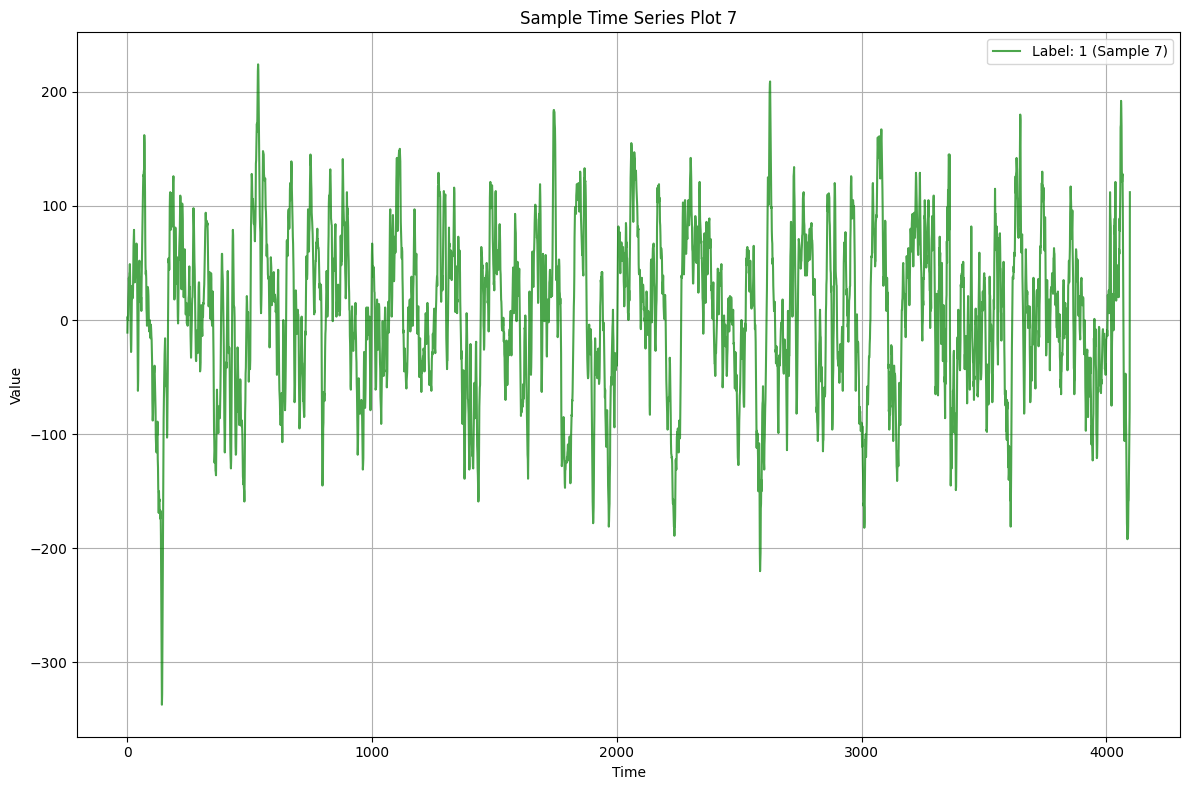

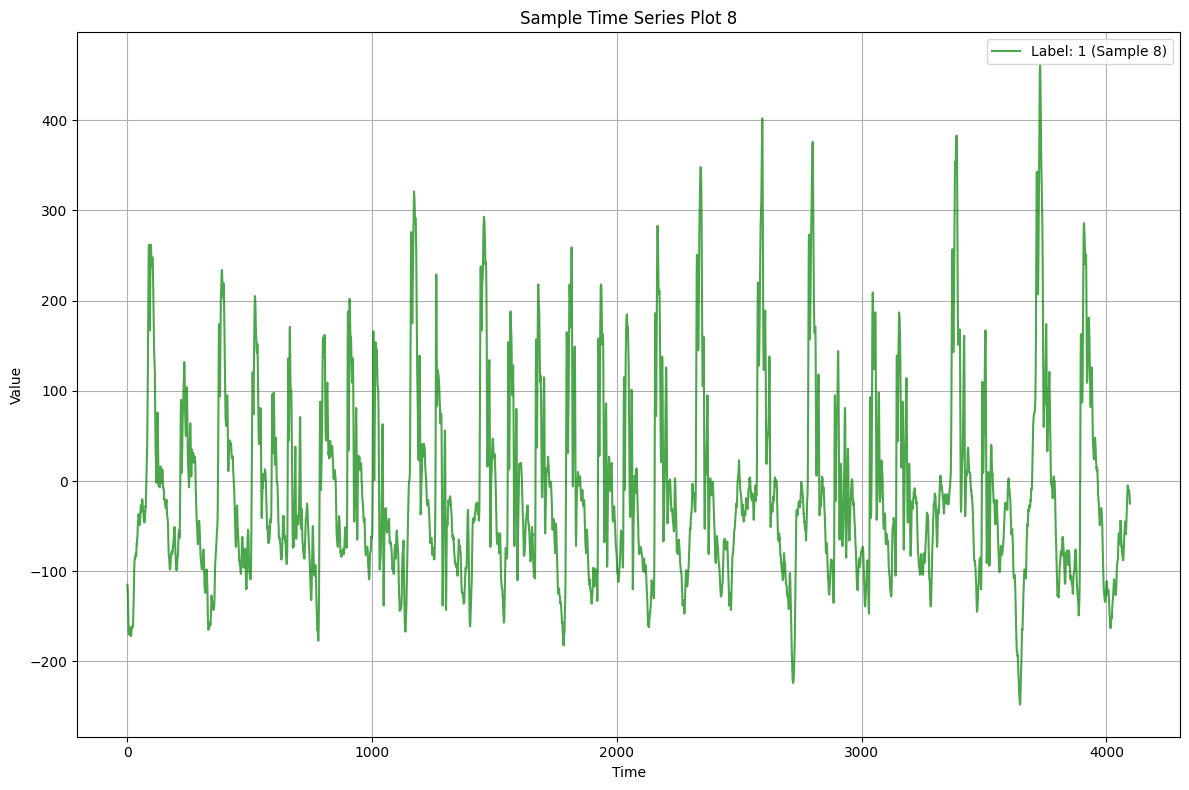

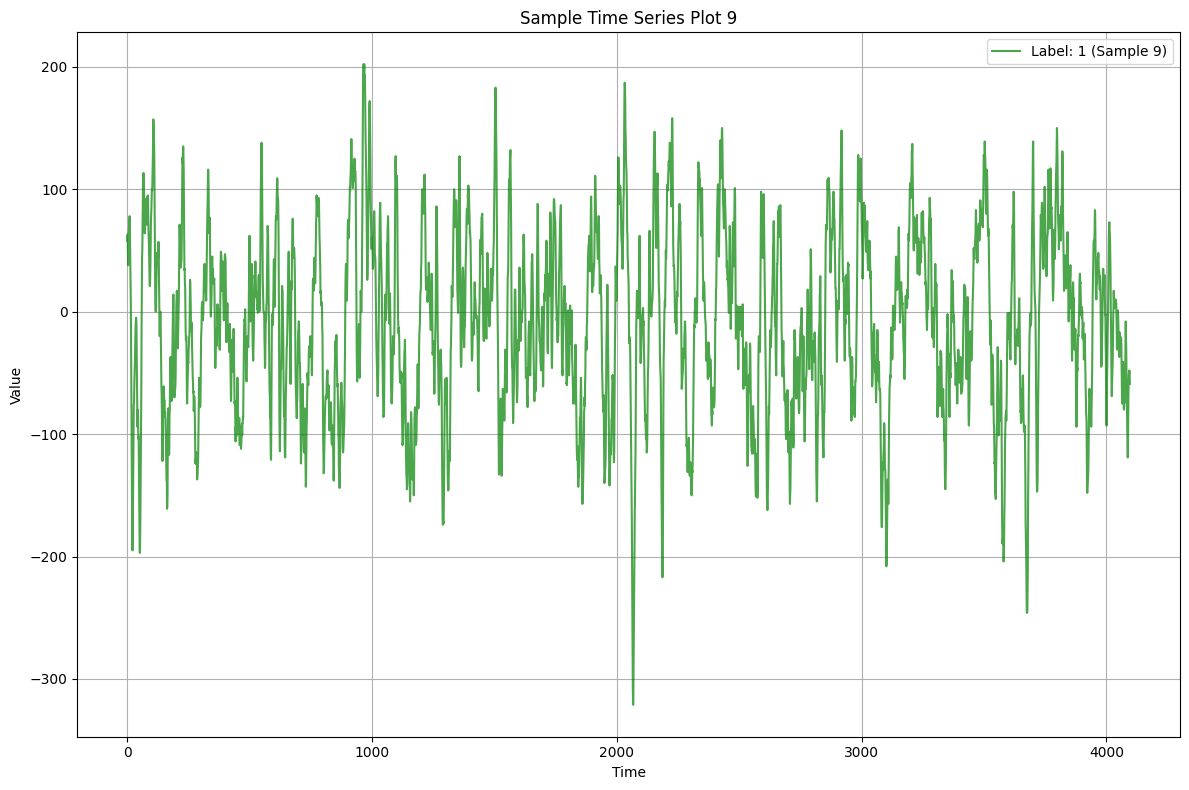

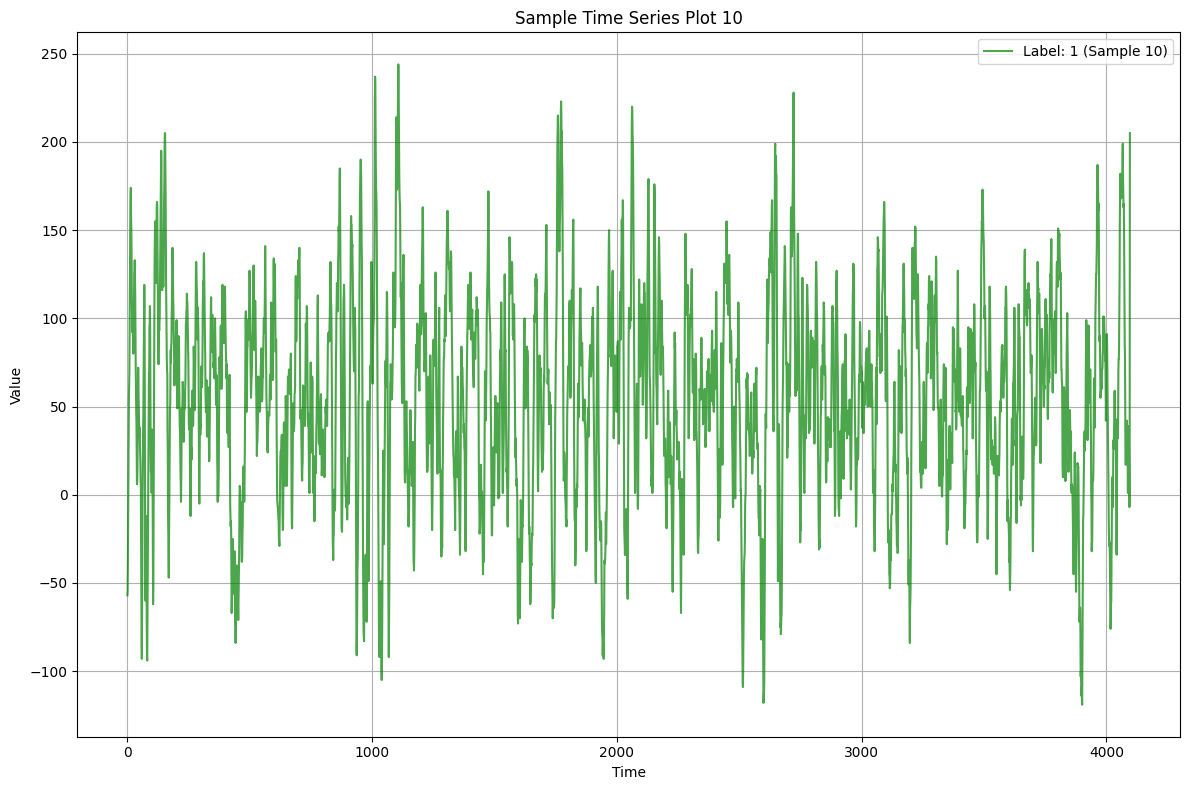

In [ ]:
sampled_data = df.groupby('Label').apply(lambda x: x.sample(5)).reset_index(drop=True)


for i in range(10):
    plt.figure(figsize=(12, 8))
    row = sampled_data.iloc[i]


    plt.plot(row['Image'], color='green', alpha=0.7, label=f"Label: {row['Label']} (Sample {i+1})")

    plt.title(f'Sample Time Series Plot {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(loc='upper right')
    plt.grid()
    plt.tight_layout()


    plt.savefig(f'time_series_plot_{i+1}.png')


    plt.show()

In [ ]:
df = shuffle(df).reset_index(drop=True)

In [ ]:
X = np.array(df['Image'].tolist())
Y = np.array(df['Label'].tolist())


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(400, 4097, 1)
(400, 1)
(100, 4097, 1)
(100, 1)


In [ ]:
# Building the model
network = Sequential()
network.add(LSTM(128, input_shape=(4097, 1)))  # LSTM units set directly

# Adding Dropout
network.add(Dropout(rate=0.3))  # Dropout rate set directly

network.add(Dense(units=1))
network.add(Activation('sigmoid'))

# Compiling the model
network.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['mae', 'accuracy']
)

# Summary of the model
print(network.summary())

# Training the model
train_history = network.fit(
    X_train,
    Y_train,
    validation_split=0.25,  # Validation split set directly
    batch_size=8,  # Batch size set directly
    epochs=12  # Number of epochs set directly
)

# Evaluating the model
test_results = network.evaluate(
    X_test,
    Y_test,
    batch_size=8  # Batch size set directly
)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.5733 - loss: 0.7485 - mae: 0.4879 - val_accuracy: 0.5900 - val_loss: 0.6305 - val_mae: 0.4543
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.7228 - loss: 0.5916 - mae: 0.4286 - val_accuracy: 0.6400 - val_loss: 0.5829 - val_mae: 0.4140
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.7488 - loss: 0.5173 - mae: 0.3693 - val_accuracy: 0.7700 - val_loss: 0.4874 - val_mae: 0.3352
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.8110 - loss: 0.4153 - mae: 0.2874 - val_accuracy: 0.7800 - val_loss: 0.5141 - val_mae: 0.3125
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.8654 - loss: 0.3421 - mae: 0.2487 - val_accuracy: 0.8400 - val_loss: 0.4335 - val_mae: 0.2386
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8823 - loss: 0.3576 - mae: 0.2159 - val_accuracy: 0.7900 - val_loss: 0.4345 - val_mae: 0.2960
Epoch 7/12
38/38 ━━━━━━━━━━━━━━

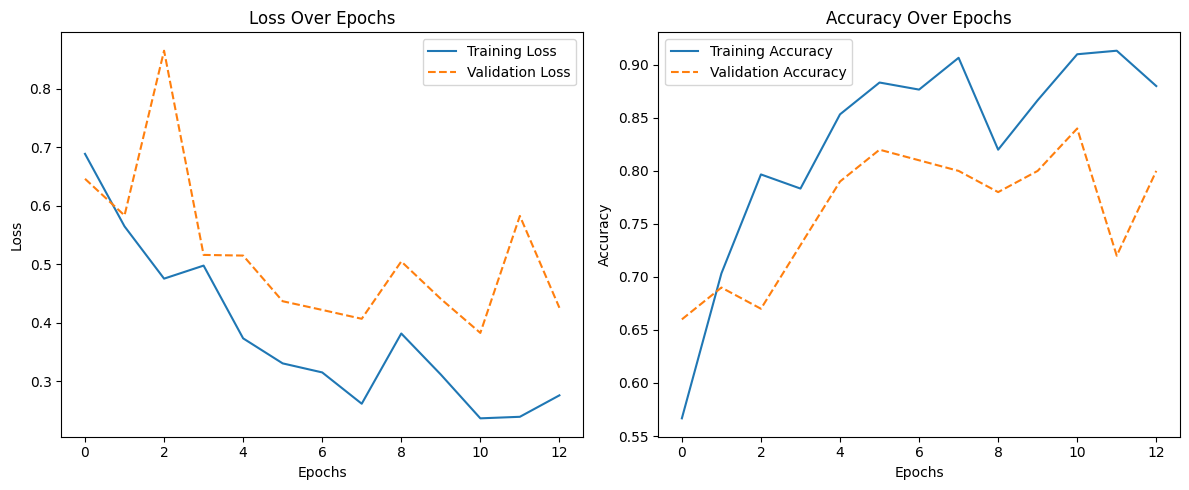

In [ ]:
# Extracting values from the training history
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy', linestyle='--')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()